## Computer_Vision && Deeplearning Project



#   Facial Emotion Recognition  Using CNN



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
import os 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [15]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# Data Sampling and Pre-Processing

***No_of Unique Emotion***

In [5]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [6]:
train_set = df[(df.Usage == 'Training')]
validation_set = df[(df.Usage == 'PublicTest')]
test_set = df[(df.Usage == 'PrivateTest')]

In [7]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 
num_class = len(label_to_text)

In [8]:
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [9]:
print('Samples per emotion:')
print(df.emotion.value_counts())

Samples per emotion:
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64


In [10]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

In [11]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[0].split())))
width = height

In [12]:
df = train_set.values
pixels = df[:, 1]
X_train = np.zeros((train_set.shape[0], 48*48))
for ix in range(X_train.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_train.shape[1]):
        X_train[ix, iy] = int(p[iy])

df = validation_set.values
pixels = df[:, 1]
X_validation = np.zeros((validation_set.shape[0], 48*48))
for ix in range(X_validation.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_validation.shape[1]):
        X_validation[ix, iy] = int(p[iy])

df = test_set.values
pixels = df[:, 1]
X_test = np.zeros((test_set.shape[0], 48*48))
for ix in range(X_test.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(X_test.shape[1]):
        X_test[ix, iy] = int(p[iy])

neutral


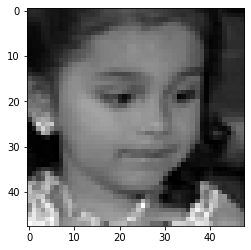

In [13]:
sample_number = 322
import numpy as np
import scipy.misc
img = np.mat(X_test[sample_number]).reshape(48,48)
plt.imshow(img,cmap='gray')
print(label_to_text[np.array(test_set.emotion)[sample_number]])

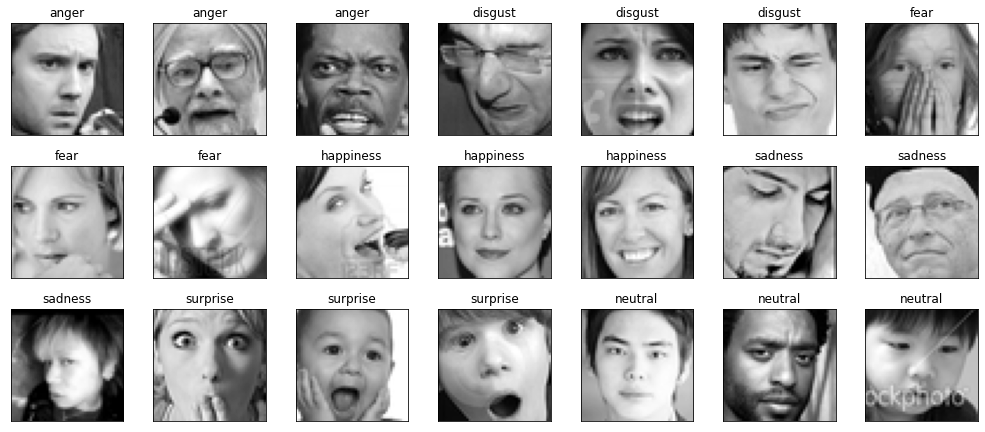

In [16]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

To form our input for the neural network, we defined image above and reshape them to (48x48x1) numpy arrays



In [17]:
num_train = X_train.shape[0]
num_validation = X_validation.shape[0]
num_test = X_test.shape[0]

X_train = X_train.reshape(num_train, width, height, depth)
X_validation = X_validation.reshape(num_test, width, height, depth)
X_test = X_test.reshape(num_test, width, height, depth)

print('Training: ',X_train.shape)
print('Validation: ',X_validation.shape)
print('Test: ',X_test.shape)

Training:  (28709, 48, 48, 1)
Validation:  (3589, 48, 48, 1)
Test:  (3589, 48, 48, 1)


In [18]:
from keras.utils import np_utils

y_train = train_set.emotion
y_train = np_utils.to_categorical(y_train, num_class)

y_validation = validation_set.emotion
y_validation = np_utils.to_categorical(y_validation, num_class)

y_test = test_set.emotion
y_test = np_utils.to_categorical(y_test, num_class)

print('Training: ',y_train.shape)
print('Validation: ',y_validation.shape)
print('Test: ',y_test.shape)

Training:  (28709, 7)
Validation:  (3589, 7)
Test:  (3589, 7)


# Model Architecture


In [19]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

model = Sequential()

model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(48,48,1)))
model.add(Convolution2D(64, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 1), padding='same'))
model.add(Convolution2D(128, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 1), padding='same'))
model.add(Convolution2D(256, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(512, (3, 1), padding='same'))
model.add(Convolution2D(512, (1, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7))
model.add(Activation('softmax'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        256       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        12352     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0

#Data Augmentation

In [21]:
from keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    rotation_range=0, 
    width_shift_range=0.0,
    height_shift_range=0.0, 
    horizontal_flip=True,  
    vertical_flip=False, 
    )


datagen.fit(X_train)
datagen.fit(X_validation)

In [22]:
batch_size = 256
num_epochs = 50

In [23]:
file_name = 'our_model.h5'
face_path= os.path.join('facial_emotion_detection',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=face_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [24]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate = .005),
                loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [25]:
validation_flow = datagen.flow(X_validation, y_validation)
train_flow = datagen.flow(X_train,y_train)

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [26]:
history = model.fit_generator(train_flow,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=validation_flow, 
                    callbacks= call_back)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


897/898 [============================>.] - ETA: 0s - loss: 1.7814 - accuracy: 0.2913
Epoch 1: val_accuracy improved from -inf to 0.34494, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 27s 24ms/step - loss: 1.7810 - accuracy: 0.2914 - val_loss: 1.7333 - val_accuracy: 0.3449
Epoch 2/50
896/898 [============================>.] - ETA: 0s - loss: 1.5249 - accuracy: 0.4146
Epoch 2: val_accuracy improved from 0.34494 to 0.45807, saving model to facial_emotion_detection/our_model.h5
898/898 [==============================] - 22s 24ms/step - loss: 1.5245 - accuracy: 0.4147 - val_loss: 1.4281 - val_accuracy: 0.4581
Epoch 3/50
897/898 [============================>.] - ETA: 0s - loss: 1.4345 - accuracy: 0.4512
Epoch 3: val_accuracy did not improve from 0.45807
898/898 [==============================] - 22s 24ms/step - loss: 1.4344 - accuracy: 0.4512 - val_loss: 1.4524 - val_accuracy: 0.4564
Epoch 4/50
898/898 [==============================] - ET

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


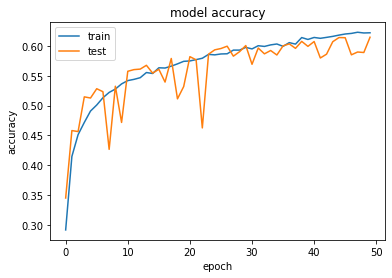

In [27]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


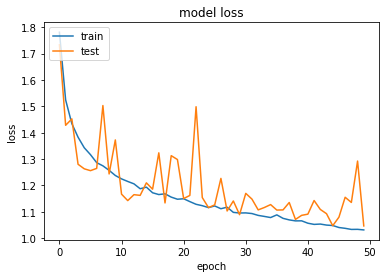

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model Prediction

actual label is:surprise
predicted label is:surprise


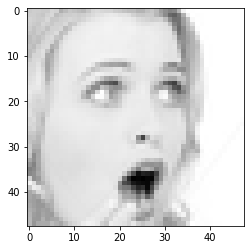

In [35]:
model = tf.keras.models.load_model(face_path)
from IPython.display import clear_output
import time
for k in range(9):
  print(f'actual label is:{label_to_text[y_test[k]]}')
  predicted_class = model.predict(tf.expand_dims(X_test[k],0)).argmax()
  print(f'predicted label is:{label_to_text[predicted_class]}')
  plt.imshow(X_test[k].reshape((48,48)),cmap = 'gray')
  plt.show()
  time.sleep(2)
  clear_output(wait= True)

#Personal Tests

In [36]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [37]:
from google.colab.patches import cv2_imshow
import cv2
def _predict(path):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  imagePath = '/content/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",label_to_text[maxindex],'----->' "These emotion is:",label_to_text[maxindex])
    cv2.putText(image, label_to_text[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 3)  
  
  cv2_imshow(image)

No of faces :  1
person  1  :  neutral ----->These emotion is: neutral


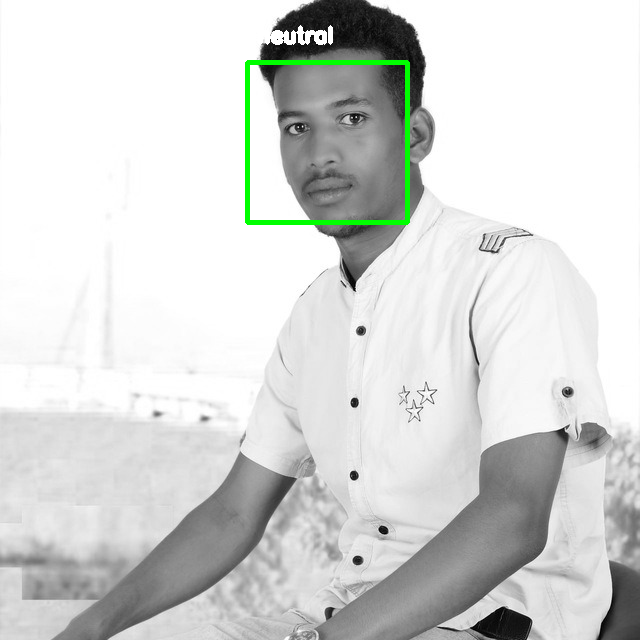

In [38]:
_predict('images/rb.jpg')

No of faces :  1
person  1  :  neutral ----->These emotion is: neutral


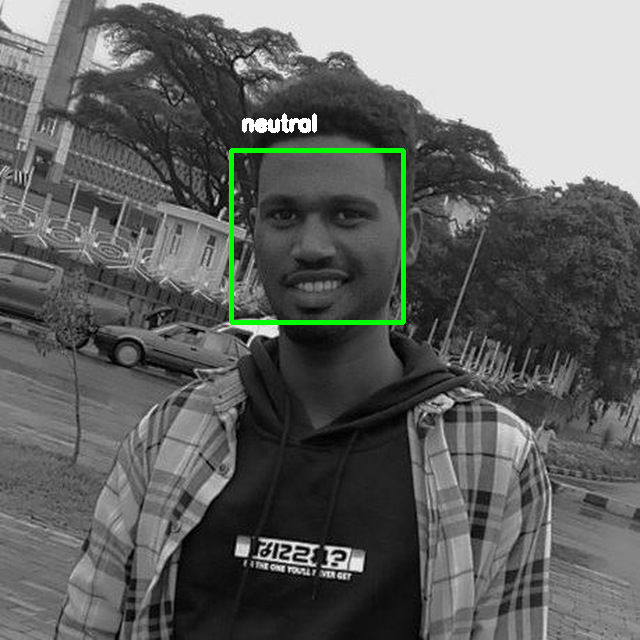

In [39]:
_predict('images/cha.jpg')